# Modeling One 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [3]:
df_2004 = pd.read_csv('./csv_files/df_2004')
df_2008 = pd.read_csv('./csv_files/df_2008')
df_2012 = pd.read_csv('./csv_files/df_2012')
df_2016 = pd.read_csv('./csv_files/df_2016')

In [4]:
df_2004.head()

,oct_rate,nov_rate,land_area,total_vote_ratio,dem_vote_ratio,rep_vote_ratio,vote_diff,continuum_2003,influence_2003,per_less_high_2000,...,per_some_college_2000,per_bachelors_or_higher_2000,less_high_change,high_dimploma_change,some_college_change,bachelors_change,per_less_high_change,per_high_dimploma_change,per_some_college_change,per_bachelors_change
0,7.8,8.3,508.03,0.374462,0.167296,0.207166,-0.039870,6,6,29.9,...,21.4,12.8,-1081.0,1111.0,1433.0,544.0,-11.2,2.5,6.7,2.0
1,5.3,5.3,655.28,0.422471,0.150904,0.271567,-0.120663,4,5,35.3,...,17.2,9.4,-2397.0,2497.0,1973.0,581.0,-10.1,4.5,4.6,1.0
2,4.0,4.6,455.24,0.364665,0.151942,0.212724,-0.060782,7,9,32.1,...,20.3,13.5,-455.0,1572.0,1619.0,1515.0,-8.4,0.6,3.5,4.3
3,3.9,3.9,1054.99,0.454130,0.173859,0.280271,-0.106412,2,2,9.2,...,36.5,31.2,1076.0,10341.0,22617.0,27040.0,-3.6,-2.9,0.2,6.3
4,3.5,3.7,569.30,0.526998,0.228582,0.298416,-0.069834,8,7,12.2,...,28.2,11.2,-603.0,132.0,325.0,72.0,-10.3,3.0,6.0,1.4


In [5]:
X = df_2004.drop(['total_vote_ratio', 'dem_vote_ratio', 'rep_vote_ratio', 'vote_diff'], axis=1)
y = df_2004.total_vote_ratio

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [7]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Remember to go back and look at ratios over 1 in EDA. make counties match up for accurate cross election comparison

In [8]:
baseline = y_train.mean()
print('baseline', baseline)

baseline 0.4298674627590971


In [9]:
lm = LinearRegression()
lm.fit(X_train, y_train)

/Users/Penelope/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
lm.score(X_train, y_train)  # R^2

0.44535360903944077

In [11]:
train_pred = lm.predict(X_train)

In [13]:
train_pred

array([ 0.44003795,  0.21718017,  0.48203578, ...,  0.41147078,
        0.44501803,  0.48595473])

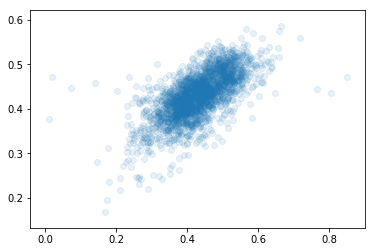

In [29]:
plt.scatter(y_train, train_pred, alpha=.1)

In [18]:
accuracy_score(y_train, train_pred)

ValueError: continuous is not supported